In [55]:
from nltk import tokenize
import numpy as np
import random
import pandas as pd

In [62]:
def split_text(filepath, min_char):
    """Convert text file to a list of sentences.
    
    Args:
    filepath: string. Filepath of text file.
    min_char: int. Minimum number of characters required for a sentence to be
    included.

    Returns:
    sentences: list of strings. List of sentences containined in the text file.
    """
    # Load data into string variable and remove new line characters
    file = open(filepath, "r", encoding="ISO-8859-1")
    text = file.read().replace('\n', ' ')
    text = text.replace('.”', '”.').replace('."', '".').replace('?”', '”?').replace('!”', '”!')
    text = text.replace('--', ' ').replace('. . .', '').replace('_', '')
    file.close()
    
    # Split text into a list of sentences
    sentences = tokenize.sent_tokenize(text)
    
    # Remove sentences that are less than min_char long
    sentences = [sent for sent in sentences if len(sent) >= min_char]

    return list(sentences)

In [63]:
# Set parameter values
min_char = 5

# Create lists

Byron = split_text('Books/Byron1.txt', min_char = min_char)\
         + split_text('Books/Byron2.txt', min_char = min_char)\
         + split_text('Books/Byron3.txt', min_char = min_char)\
         + split_text('Books/Byron4.txt', min_char = min_char)\
         + split_text('Books/Byron5.txt', min_char = min_char)
            
Percy = split_text('Books/Adonais.txt', min_char = min_char)\
        + split_text('Books/PeterBell.txt', min_char = min_char)\
        + split_text('Books/ProseWorks.txt', min_char = min_char)\
        + split_text('Books/ProseWorks2.txt', min_char = min_char)\
        + split_text('Books/WitchOfAtlas.txt', min_char = min_char)  

Godwin = split_text('Books/CalebWilliams.txt', min_char = min_char)\
         + split_text('Books/Imogen.txt', min_char = min_char)\
         + split_text('Books/LivesOfNecromancer.txt', min_char = min_char)


Polidori = split_text('Books/Diary.txt', min_char = min_char)\
            + split_text('Books/TheVampyre.txt', min_char = min_char)  

Mary = split_text('Books/Frankenstein.txt', min_char = min_char)\
        + split_text('Books/Mathilda.txt', min_char = min_char)\
        + split_text('Books/ProsperineMidas.txt', min_char = min_char)\
        + split_text('Books/TalesStories.txt', min_char = min_char) 


In [65]:
text_dict = {'Byron': Byron, 'Percy': Percy, 'Godwin': Godwin, 'Polidori': Polidori,
             'Mary': Mary}

for key in text_dict.keys():
    print(key, ':', len(text_dict[key]))

Byron : 48521
Percy : 13478
Godwin : 14411
Polidori : 3385
Mary : 11259


In [66]:
# Set random seed
np.random.seed(1)

# Set length parameter
max_len = 3350

# Select sentences
names = [Byron, Percy, Godwin, Polidori, Mary]
combined = []

for name in names:
    name = np.random.choice(name, max_len, replace = False)
    combined += list(name)

print('The length of the combined list is:', len(combined))

The length of the combined list is: 16750


In [67]:
labels = ['Byron']*max_len + ['Percy']*max_len + ['Godwin']*max_len + ['Polidori']*max_len\
         + ['Mary']*max_len

print('The length of the labels list is:', len(labels))

The length of the labels list is: 16750


In [68]:
# Set random seed
random.seed(3)

# Randomly shuffle data
zipped = list(zip(combined, labels))
random.shuffle(zipped)
combined, labels = zip(*zipped)

In [69]:
# Create pandas dataframe
out_data = pd.DataFrame()
out_data['text'] = combined
out_data['author'] = labels

print(out_data.head())

                                                text    author
0                                           Lucifer.     Byron
1  But what was our surprise, when the door opene...  Polidori
2  The Foundation makes no representations concer...  Polidori
3  Louis and his companions proceeded towards the...      Mary
4  Any alternate format must include the full Pro...     Percy


In [76]:
out_data.to_csv('author_data.csv', index=False)
!pip install --upgrade tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=38f0ed2b0092a2d626904dcc754853394da3f01c5097e14dddeb4a1f3ca69439
  Stored in directory: c:\users\gdple\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [78]:
import numpy as np
import pandas as pd
import chardet
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import string
import time


import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.preprocessing import LabelBinarizer
from sklearn.svm import SVC


from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout, Embedding
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.merge import concatenate
from tensorflow.keras.optimizers import Adam # - Works
from keras.preprocessing.text import one_hot
from keras.callbacks import ModelCheckpoint 

from scipy import sparse, stats

In [83]:
with open(r"author_data.csv", 'rb') as file:
    print(chardet.detect(file.read()))

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [140]:
data2 = pd.read_csv(r"author_data2.csv", encoding="utf-8")
print(data2.head())

                                                text author
0  But I now indulge in dreams of bliss that cann...   Mary
1  Sometimes I endeavoured to gain from Frankenst...   Mary
2                 I had certainly acted imprudently.   Mary
3  The ball had entered my shoulder, and I knew n...   Mary
4  âYou have travelled; you have spent several ...   Mary


In [163]:
# Create feature (text) and label (author) lists
text2 = list(data2['text'].values)
author2 = list(data2['author'].values)

print("The author dataset contains {} datapoints.".format(len(text)))

Counter(author2)

The author dataset contains 3181 datapoints.


Counter({'Byron': 3350,
         'Polidori': 3350,
         'Mary': 3350,
         'Percy': 3350,
         'Godwin': 3350})

In [162]:
print(text[10000])

IndexError: list index out of range

In [89]:
word_count = []
char_count = []

for i in range(len(text)):
    word_count.append(len(text[i].split()))
    char_count.append(len(text[i]))

# Convert lists to numpy arrays
word_count = np.array(word_count)
char_count = np.array(char_count)

# Calculate average word lengths
ave_length = np.array(char_count)/np.array(word_count)

In [90]:
def get_stats(var):
    """Print summary statistics for a variable of interest.
    
    Args:
    var: array. Numpy array containing values for the variable of interest.

    Returns:
    None
    """
    print("Min:", np.min(var))
    print("Max:", np.max(var))
    print("Mean:", np.mean(var))
    print("Median", np.median(var))
    print("1st percentile", np.percentile(var, 1))
    print("95th percentile", np.percentile(var, 95))
    print("99th percentile", np.percentile(var, 99))
    print("99.5th Percentile", np.percentile(var, 99.5))
    print("99.9th Percentile", np.percentile(var, 99.9))

In [91]:
print("Word count statistics")
get_stats(word_count)

Word count statistics
Min: 1
Max: 448
Mean: 21.804119402985073
Median 18.0
1st percentile 1.0
95th percentile 56.0
99th percentile 81.0
99.5th Percentile 95.0
99.9th Percentile 151.00400000000081


C:\Users\gdple\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered

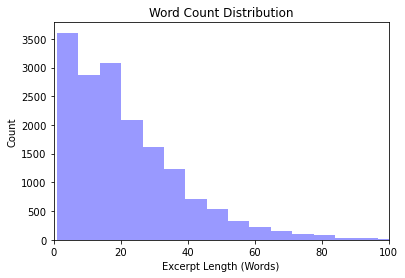

In [92]:
sns.distplot(word_count, kde = False, bins = 70, color = 'blue').set_title("Word Count Distribution")
plt.xlabel('Excerpt Length (Words)')
plt.ylabel('Count')
plt.xlim(0, 100)
plt.savefig("word_count.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

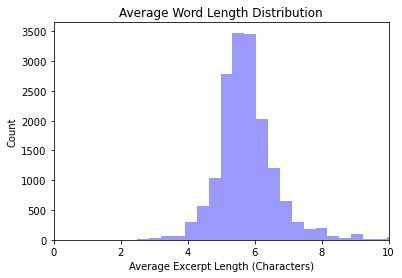

In [93]:
sns.distplot(ave_length, kde = False, bins = 70, color = 'blue').set_title("Average Word Length Distribution")
plt.xlabel('Average Excerpt Length (Characters)')
plt.ylabel('Count')
plt.xlim(0, 10)
plt.savefig("ave_length.eps")

In [94]:
word_outliers = np.where(word_count > 150)

for i in word_outliers[0]:
    print("Excerpt {} - Length: {}".format(i, word_count[i]))
    print(text[i], "\n")

Excerpt 332 - Length: 181
The league of mightiest nations, in those hours       When Venice was an envy, might abate,       But did not quench, her spirit in her fate     All were enwrapped: the feasted monarchs knew       And loved their hostess, nor could learn to hate,     Although they humbled with the kingly few     The many felt, for from all days and climes     She was the voyager's worship; even her crimes                    110     Were of the softer order, born of Love      She drank no blood, nor fattened on the dead,     But gladdened where her harmless conquests spread;     For these restored the Cross, that from above     Hallowed her sheltering banners, which incessant     Flew between earth and the unholy Crescent,[242]     Which, if it waned and dwindled, Earth may thank     The city it has clothed in chains, which clank     Now, creaking in the ears of those who owe     The name of Freedom to her glorious struggles;                     120     Yet she but shares with 

In [95]:
text_string = ''

for i in range(len(text)):
    text_string += text[i].lower()

# Get character frequencies
char_cnt = Counter(text_string)
print(char_cnt)
print(len(char_cnt))

Counter({' ': 382253, 'e': 210231, 't': 149054, 'a': 125948, 'o': 124090, 'i': 116984, 'n': 113173, 's': 104824, 'r': 100556, 'h': 97449, 'd': 69986, 'l': 63606, 'u': 46380, 'c': 44331, 'm': 43585, 'f': 40104, 'w': 34381, 'y': 31512, 'p': 31255, ',': 30373, 'g': 29656, 'b': 25019, '.': 17533, 'v': 17391, 'k': 8767, ';': 4114, 'â': 3105, '\x80': 3099, 'x': 3087, '1': 3001, "'": 2632, '"': 2542, 'j': 2458, '-': 1936, 'q': 1611, '[': 1477, ']': 1451, '2': 1374, ':': 1357, 'z': 1320, '8': 1221, '0': 1188, '\x94': 1180, '!': 1168, '3': 1098, '?': 991, '4': 844, ')': 822, '(': 803, '5': 800, '7': 760, '\x9c': 753, '6': 694, '9': 682, '\x9d': 640, '\x99': 480, '*': 431, 'ã': 297, 'î': 282, '&': 154, '/': 123, 'ï': 118, '{': 78, '}': 76, '©': 68, 'ª': 47, '¨': 45, 'á': 45, '½': 43, '¦': 42, '£': 39, '±': 39, '¿': 39, '\xa0': 38, '¼': 36, 'µ': 36, '\x98': 32, '¹': 32, '+': 28, '\x84': 23, '\x82': 21, '\x81': 20, '´': 19, '\x83': 19, '\\': 17, '»': 16, 'º': 16, '¢': 15, '«': 14, '|': 14, '$': 13

In [96]:
print(list(char_cnt.keys()))

['l', 'u', 'c', 'i', 'f', 'e', 'r', '.', 'b', 't', ' ', 'w', 'h', 'a', 's', 'o', 'p', ',', 'n', 'd', 'v', 'g', ':', 'y', 'k', 'm', 'j', '-', '1', ';', "'", '(', '8', ')', '2', '3', '"', 'ã', '©', '¨', 'ª', '5', '!', 'q', '[', '4', '9', '6', ']', '7', 'z', 'â', '\x80', '\x9d', '\x9c', '\x94', 'x', '0', '\x99', '?', '*', '&', '\x98', '$', 'å', '\x92', '{', '}', '\xa0', 'æ', '«', '¢', '/', '¦', '~', '%', '\\', '£', '\x86', 'î', '»', 'ê', '¹', '=', '+', '¼', '@', '¶', '|', '¯', '¤', '#', '<', '>', '´', '§', 'ä', '\x81', 'è', '¬', '±', 'ï', 'µ', '\x84', '¿', '½', '·', '\x89', '\x83', '\x85', 'º', '\x88', '³', '\x91', '®', 'á', '²', '\x90', '\x82', '¸', '\x95', '\x87', '\x8d', '\xad', '¾', '\x97', '\x8b', '¡', 'é', '\x93', '\x8f', '\x9f', '°', '\x96', '\x8c', '¥', '\x9a', '^']


In [97]:
# Create list of accented characters
accented_chars = ['ï', 'é', 'ñ', 'è', 'ö', 'æ', 'ô', 'â', 'á', 'à', 'ê', 'ë']

# Find all texts containing unusual characters
accented_text = []

for i in range(len(text)):
    for j in text[i]:
        if j in accented_chars:
            accented_text.append(i)
        
accented_text = list(set(accented_text))
 
print('There are', str(len(accented_text)), 'texts containing accented characters.')

There are 1611 texts containing accented characters.


In [98]:
for i in accented_text:
    print("Excerpt {}".format(i))
    print(text[i] + '\n')

Excerpt 8192
May 21.âWent to see a panorama of Thun, the first Swiss one: crowded foolishly with people, and too small.

Excerpt 8195
For scarcely had he, solitary among his fellows, pronounced the sentence of death against this prince, than Robert of Flanders, the brother-in-law of Charles himself, struck him on the breast with a staff, crying, âIt behoves not thee, wretch, to condemn to death so noble and worthy a knight.â The judge fell dead in the presence of the king, who dared not avenge his creature.

Excerpt 8198
The consuls for the English are not of the most magnanimous order of Greeks, and far from being so liberal, generally speaking; although there are, in course, some exceptions, and Strané of Patras has been more honourably mentioned.

Excerpt 16400
No one could love a child more than I loved your brotherââtears came into his eyes as he spokeââbut is it not a duty to the survivors that we should refrain from augmenting their unhappiness by an appearance of 

In [102]:
text = [excerpt.replace('\xa0', '') for excerpt in text]
text = [excerpt.replace('\x80', '') for excerpt in text]
text = [excerpt.replace('\x9d', '') for excerpt in text]
text = [excerpt.replace('\x9c', '') for excerpt in text]
text = [excerpt.replace('\x94', '') for excerpt in text]
text = [excerpt.replace('\x99', '') for excerpt in text]
text = [excerpt.replace('\x98', '') for excerpt in text]
text = [excerpt.replace('\x92', '') for excerpt in text]
text = [excerpt.replace('\x86', '') for excerpt in text]
text = [excerpt.replace('\x85', '') for excerpt in text]
text = [excerpt.replace('\x84', '') for excerpt in text]
text = [excerpt.replace('\x83', '') for excerpt in text]
text = [excerpt.replace('\x82', '') for excerpt in text]

In [103]:
print(list(char_cnt.keys()))

['l', 'u', 'c', 'i', 'f', 'e', 'r', '.', 'b', 't', ' ', 'w', 'h', 'a', 's', 'o', 'p', ',', 'n', 'd', 'v', 'g', ':', 'y', 'k', 'm', 'j', '-', '1', ';', "'", '(', '8', ')', '2', '3', '"', 'ã', '©', '¨', 'ª', '5', '!', 'q', '[', '4', '9', '6', ']', '7', 'z', 'â', '\x80', '\x9d', '\x9c', '\x94', 'x', '0', '\x99', '?', '*', '&', '\x98', '$', 'å', '\x92', '{', '}', '\xa0', 'æ', '«', '¢', '/', '¦', '~', '%', '\\', '£', '\x86', 'î', '»', 'ê', '¹', '=', '+', '¼', '@', '¶', '|', '¯', '¤', '#', '<', '>', '´', '§', 'ä', '\x81', 'è', '¬', '±', 'ï', 'µ', '\x84', '¿', '½', '·', '\x89', '\x83', '\x85', 'º', '\x88', '³', '\x91', '®', 'á', '²', '\x90', '\x82', '¸', '\x95', '\x87', '\x8d', '\xad', '¾', '\x97', '\x8b', '¡', 'é', '\x93', '\x8f', '\x9f', '°', '\x96', '\x8c', '¥', '\x9a', '^']


In [104]:
# Count texts containing white space blocks
ctr = 0
for excerpt in text:
    if "  " in excerpt:
        ctr += 1

print('There are', ctr, 'excerpts containing blocks of white space.')

There are 2416 excerpts containing blocks of white space.


In [105]:
# Remove blocks of white space
new_text = []

for excerpt in text:
    while "  " in excerpt:
        excerpt = excerpt.replace("  "," ")
    new_text.append(excerpt)

text = new_text
print(len(text))

16750


In [106]:
ctr = 0
for excerpt in text:
    if "  " in excerpt:
        ctr += 1

print('There are', ctr, 'excerpts containing blocks of white space.')

There are 0 excerpts containing blocks of white space.


In [147]:
normed_text2 = []

for i in range(len(text2)):
    new = text2[i].lower()
    new = new.translate(str.maketrans('','', string.punctuation))
    new = new.replace('“', '').replace('”', '')
    normed_text2.append(new)
    
print(normed_text2[0:5])    
print(len(normed_text2))

['but i now indulge in dreams of bliss that cannot be realised', 'sometimes i endeavoured to gain from frankenstein the particulars of his creatureâ\x80\x99s formation but on this point he was impenetrable', 'i had certainly acted imprudently', 'the ball had entered my shoulder and i knew not whether it had remained there or passed through at any rate i had no means of extracting it', 'â\x80\x9cyou have travelled you have spent several years of your life at ingolstadt and i confess to you my friend that when i saw you last autumn so unhappy flying to solitude from the society of every creature i could not help supposing that you might regret our connection and believe yourself bound in honour to fulfil the wishes of your parents although they opposed themselves to your inclinations']
3181


In [108]:
text_train, text_test, author_train, author_test = train_test_split(normed_text, author, test_size = 0.2, random_state = 5)

In [165]:
print(np.shape(text_train))
text_test = text2
print(np.shape(text_test))
print(np.shape(author_train))
author_test = author2
print(np.shape(author_test))

(13400,)
(3181,)
(13400,)
(3181,)


In [110]:
def create_n_grams(excerpt_list, n, vocab_size, seq_size):
    """Create a list of n-gram sequences
    
    Args:
    excerpt_list: list of strings. List of normalized text excerpts.
    n: int. Length of n-grams.
    vocab_size: int. Size of n-gram vocab (used in one-hot encoding)
    seq_size: int. Size of n-gram sequences
    
    Returns:
    n_gram_array: array. Numpy array of one-hot encoded n-grams.
    """
    n_gram_list = []

    for excerpt in excerpt_list:
        # Remove spaces
        excerpt = excerpt.replace(" ", "")

        # Extract n-grams
        n_grams = [excerpt[i:i + n] for i in range(len(excerpt) - n + 1)]

        # Convert to a single string with spaces between n-grams
        new_string = " ".join(n_grams)

        # One hot encode
        hot = one_hot(new_string, round(vocab_size*1.3))

        # Pad hot if necessary
        hot_len = len(hot)
        if hot_len >= seq_size:
            hot = hot[0:seq_size]
        else:
            diff = seq_size - hot_len
            extra = [0]*diff
            hot = hot + extra

        n_gram_list.append(hot)
    
    n_gram_array = np.array(n_gram_list)
    
    return n_gram_array

In [111]:
def get_vocab_size(excerpt_list, n, seq_size):
    """Calculate size of n-gram vocab
    
    Args:
    excerpt_list: list of strings. List of normalized text excerpts.
    n: int. Length of n-grams.
    seq_size: int. Size of n-gram sequences
    
    Returns:
    vocab_size: int. Size of n-gram vocab.
    """
    n_gram_list = []

    for excerpt in excerpt_list:
        # Remove spaces
        excerpt = excerpt.replace(" ", "")

        # Extract n-grams           
        n_grams = [excerpt[i:i + n] for i in range(len(excerpt) - n + 1)]

        # Create list of n-grams
        gram_len = len(n_grams)
        if gram_len >= seq_size:
            n_grams = n_grams[0:seq_size]
        else:
            diff = seq_size - gram_len
            extra = [0]*diff
            n_grams = n_grams + extra
        
        n_gram_list.append(n_grams)
    
    # Flatten n-gram list
    n_gram_list = list(np.array(n_gram_list).flat)
    
    # Calculate vocab size
    n_gram_cnt = Counter(n_gram_list)
    vocab_size = len(n_gram_cnt)
    
    return vocab_size

In [112]:

for i in range(1, 4):
    vocab_size = get_vocab_size(text_train, i, 350)
    print('Vocab size for n =', i, 'is:', vocab_size)

Vocab size for n = 1 is: 93
Vocab size for n = 2 is: 1499
Vocab size for n = 3 is: 13225


In [151]:
gram1_train = create_n_grams(text_train, 1, 93, 350)
gram2_train = create_n_grams(text_train, 2, 1499, 350)
gram3_train = create_n_grams(text_train, 3, 13225, 350)

gram1_test = create_n_grams(text_test, 1, 93, 350)
gram2_test = create_n_grams(text_test, 2, 1499, 350)
gram3_test = create_n_grams(text_test, 3, 13225, 350)

print(np.shape(gram1_train))
print(np.shape(gram2_train))
print(np.shape(gram3_train))

print(np.shape(gram1_test))
print(np.shape(gram2_test))
print(np.shape(gram3_test))

(13400, 350)
(13400, 350)
(13400, 350)
(3181, 350)
(3181, 350)
(3181, 350)


In [114]:
max_1gram = np.max(gram1_train)
max_2gram = np.max(gram2_train)
max_3gram = np.max(gram3_train)

print('Maximum encoding value for 1-grams is: ', max_1gram)
print('Maximum encoding value for 2-grams is: ', max_2gram)
print('Maximum encoding value for 3-grams is: ', max_3gram)

Maximum encoding value for 1-grams is:  120
Maximum encoding value for 2-grams is:  1948
Maximum encoding value for 3-grams is:  17190


In [115]:
def process_data(excerpt_list):
    """Stem data, remove stopwords and split into word lists
    
    Args:
    excerpt_list: list of strings. List of normalized text excerpts.
    
    Returns:
    processed: list of strings. List of lists of processed text excerpts (stemmed and stop words removed).
    """
    stop_words = set(stopwords.words('english'))
    porter = PorterStemmer()
    
    processed = []
    
    for excerpt in excerpt_list:
        new = excerpt.split()
        word_list = [porter.stem(w) for w in new if not w in stop_words]
        word_list = " ".join(word_list)
        processed.append(word_list)
    
    return processed

In [153]:
# Process data subsets
processed_train = process_data(text_train)
processed_test = process_data(text_test)

print(processed_train[0:5])

['wolfstein rush toward threw feet exclaim âif ever one instant soul alien thee ever swerv affect sworn thee may red right hand god instantan dash beneath lowest abyss hell', 'copi display perform distribut redistribut electron work part electron work without promin display sentenc set forth paragraph 1e1 activ link immedi access full term project gutenbergtm licens', 'lord look father wish hallow last word heart duti repli faith affianc', 'afterward went absurd thing told found hurt might possibl hurt other care much', 'faustu told prepar certain articl necessari demon fulli accord attend time requir day life bring everi thing want come shape faustu requir invis faustu invis whenev desir deni noth answer perfect verac everi thing demand']


In [154]:
# Create bag of words features
## Fit Tfidf Vectorizer
vectorizer = TfidfVectorizer(strip_accents = 'ascii', stop_words = 'english', min_df = 6)
vectorizer.fit(processed_train)

# Get size of vocabulary
print('Vocabulary size: ', len(vectorizer.vocabulary_))

# Create feature vectors
words_train = vectorizer.transform(processed_train)
words_test = vectorizer.transform(processed_test)

Vocabulary size:  3814


In [118]:
# One hot encode labels
author_lb = LabelBinarizer()

author_lb.fit(author_train)
author_train_hot = author_lb.transform(author_train)
author_test_hot = author_lb.transform(author_test)

In [119]:
# Define model architecture in keras
# Code reference: https://machinelearningmastery.com/develop-n-gram-multichannel-convolutional-neural-network-sentiment-analysis/
def define_model(input_len, output_size, vocab_size, embedding_dim, verbose = True,
                drop_out_pct = 0.25, conv_filters = 500, activation_fn = 'relu', pool_size = 2, learning = 0.0001):
    """Define n-gram CNN
    
    Args:
    input_len: int. Length of input sequences.
    output_size: int. Number of output classes.
    vocab_size: int. Maximum value of n-gram encoding.
    embedding_dim: int. Size of embedding layer.
    verbose: bool. Whether or not to print model summary.
    drop_out_pct: float. Drop-out rate.
    conv_filters: int. Number of filters in the conv layer.
    activation_fn: string. Activation function to use in the convolutional layer.
    pool_size: int. Pool size for the max pooling layer.
    learning: float. Learning rate for the model optimizer.
    
    Returns:
    model: keras model object. 
    """
    # Channel 1
    inputs1 = Input(shape = (input_len,))
    embedding1 = Embedding(vocab_size, embedding_dim)(inputs1)
    drop1 = Dropout(drop_out_pct)(embedding1)
    conv1 = Conv1D(filters = conv_filters, kernel_size = 3, activation = activation_fn)(drop1)
    pool1 = MaxPooling1D(pool_size = pool_size)(conv1)
    flat1 = Flatten()(pool1)
    
    # Channel 2
    inputs2 = Input(shape = (input_len,))
    embedding2 = Embedding(vocab_size, embedding_dim)(inputs2)
    drop2 = Dropout(drop_out_pct)(embedding2)
    conv2 = Conv1D(filters = conv_filters, kernel_size = 4, activation = activation_fn)(drop2)
    pool2 = MaxPooling1D(pool_size = pool_size)(conv2)
    flat2 = Flatten()(pool2)

    # Channel 3
    inputs3 = Input(shape = (input_len,))
    embedding3= Embedding(vocab_size, embedding_dim)(inputs3)
    drop3 = Dropout(drop_out_pct)(embedding3)
    conv3 = Conv1D(filters = conv_filters, kernel_size = 5, activation = activation_fn)(drop3)
    pool3 = MaxPooling1D(pool_size = pool_size)(conv3)
    flat3 = Flatten()(pool3)
    
    # Merge channels
    merged = concatenate([flat1, flat2, flat3])
    
    # Create output layer
    output = Dense(output_size, activation = 'softmax')(merged)
    
    # Create model
    model = Model(inputs = [inputs1, inputs2, inputs3], outputs = output)
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer = Adam(lr = learning), metrics=['accuracy'])
    
    if verbose:
        print(model.summary())
        
    return model

In [122]:
gram1_model = define_model(350, 5, max_1gram + 1, 26)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 350)]        0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 350)]        0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 350)]        0           []                               
                                                                                                  
 embedding_3 (Embedding)        (None, 350, 26)      3146        ['input_4[0][0]']                
                                                                                            

In [123]:
gram1_model.fit([gram1_train, gram1_train, gram1_train], author_train_hot, epochs=10, batch_size=32, 
                verbose = 1, validation_split = 0.2)

Epoch 1/10
335/335 [==============================] - 50s 146ms/step - loss: 1.5824 - accuracy: 0.2552 - val_loss: 1.5769 - val_accuracy: 0.2668
Epoch 2/10
335/335 [==============================] - 49s 148ms/step - loss: 1.5577 - accuracy: 0.2883 - val_loss: 1.5663 - val_accuracy: 0.2813
Epoch 3/10
335/335 [==============================] - 49s 145ms/step - loss: 1.5261 - accuracy: 0.3273 - val_loss: 1.5517 - val_accuracy: 0.2989
Epoch 4/10
335/335 [==============================] - 48s 144ms/step - loss: 1.4734 - accuracy: 0.3794 - val_loss: 1.5353 - val_accuracy: 0.3194
Epoch 5/10
335/335 [==============================] - 48s 144ms/step - loss: 1.4053 - accuracy: 0.4263 - val_loss: 1.5153 - val_accuracy: 0.3354
Epoch 6/10
335/335 [==============================] - 48s 144ms/step - loss: 1.3441 - accuracy: 0.4596 - val_loss: 1.5405 - val_accuracy: 0.3168
Epoch 7/10
335/335 [==============================] - 49s 145ms/step - loss: 1.2780 - accuracy: 0.4946 - val_loss: 1.5275 - val_ac

In [124]:
gram2_model = define_model(350, 5, max_2gram + 1, 300)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 350)]        0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 350)]        0           []                               
                                                                                                  
 input_9 (InputLayer)           [(None, 350)]        0           []                               
                                                                                                  
 embedding_6 (Embedding)        (None, 350, 300)     584700      ['input_7[0][0]']                
                                                                                            

In [125]:
gram2_model.fit([gram2_train, gram2_train, gram2_train], author_train_hot, epochs=10, batch_size=32, 
                verbose = 1, validation_split = 0.2)

Epoch 1/10
335/335 [==============================] - 169s 501ms/step - loss: 1.5870 - accuracy: 0.2632 - val_loss: 1.5780 - val_accuracy: 0.2724
Epoch 2/10
335/335 [==============================] - 163s 486ms/step - loss: 1.5226 - accuracy: 0.3405 - val_loss: 1.5615 - val_accuracy: 0.3071
Epoch 3/10
335/335 [==============================] - 162s 482ms/step - loss: 1.4158 - accuracy: 0.4443 - val_loss: 1.4716 - val_accuracy: 0.3724
Epoch 4/10
335/335 [==============================] - 161s 481ms/step - loss: 1.2473 - accuracy: 0.5387 - val_loss: 1.4226 - val_accuracy: 0.3951
Epoch 5/10
335/335 [==============================] - 166s 494ms/step - loss: 1.0829 - accuracy: 0.6172 - val_loss: 1.4324 - val_accuracy: 0.4090
Epoch 6/10
335/335 [==============================] - 163s 486ms/step - loss: 0.9461 - accuracy: 0.6825 - val_loss: 1.4156 - val_accuracy: 0.4194
Epoch 7/10
335/335 [==============================] - 160s 477ms/step - loss: 0.8271 - accuracy: 0.7280 - val_loss: 1.4345 -

In [126]:
# Create the 3-gram model
gram3_model = define_model(350, 5, max_3gram + 1, 600)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 350)]        0           []                               
                                                                                                  
 input_11 (InputLayer)          [(None, 350)]        0           []                               
                                                                                                  
 input_12 (InputLayer)          [(None, 350)]        0           []                               
                                                                                                  
 embedding_9 (Embedding)        (None, 350, 600)     10314600    ['input_10[0][0]']               
                                                                                            

In [128]:
gram3_model.fit([gram3_train, gram3_train, gram3_train], author_train_hot, epochs=10, batch_size=32, 
                verbose = 1, validation_split = 0.2)

Epoch 1/10
335/335 [==============================] - 356s 1s/step - loss: 1.5692 - accuracy: 0.2864 - val_loss: 1.5687 - val_accuracy: 0.2907
Epoch 2/10
335/335 [==============================] - 365s 1s/step - loss: 1.4540 - accuracy: 0.4275 - val_loss: 1.5032 - val_accuracy: 0.3679
Epoch 3/10
335/335 [==============================] - 356s 1s/step - loss: 1.1885 - accuracy: 0.6131 - val_loss: 1.3436 - val_accuracy: 0.4448
Epoch 4/10
335/335 [==============================] - 377s 1s/step - loss: 0.8723 - accuracy: 0.7296 - val_loss: 1.2811 - val_accuracy: 0.4869
Epoch 5/10
335/335 [==============================] - 377s 1s/step - loss: 0.6306 - accuracy: 0.8163 - val_loss: 1.3014 - val_accuracy: 0.4914
Epoch 6/10
335/335 [==============================] - 375s 1s/step - loss: 0.4570 - accuracy: 0.8800 - val_loss: 1.3196 - val_accuracy: 0.4937
Epoch 7/10
335/335 [==============================] - 380s 1s/step - loss: 0.3399 - accuracy: 0.9185 - val_loss: 1.3929 - val_accuracy: 0.4940

In [129]:
svm = SVC()
params = {'kernel': ['linear'], 'C':[1, 10, 100]}
scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(svm, params, scoring = scorer, verbose = 50)

In [130]:
np.random.seed(6)
word_svm = grid_obj.fit(words_train, author_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START C=1, kernel=linear..........................................
[CV 1/5; 1/3] END ...........C=1, kernel=linear;, score=0.546 total time=   9.4s
[CV 2/5; 1/3] START C=1, kernel=linear..........................................
[CV 2/5; 1/3] END ...........C=1, kernel=linear;, score=0.542 total time=   9.1s
[CV 3/5; 1/3] START C=1, kernel=linear..........................................
[CV 3/5; 1/3] END ...........C=1, kernel=linear;, score=0.550 total time=   9.1s
[CV 4/5; 1/3] START C=1, kernel=linear..........................................
[CV 4/5; 1/3] END ...........C=1, kernel=linear;, score=0.541 total time=   9.1s
[CV 5/5; 1/3] START C=1, kernel=linear..........................................
[CV 5/5; 1/3] END ...........C=1, kernel=linear;, score=0.550 total time=   9.0s
[CV 1/5; 2/3] START C=10, kernel=linear.........................................
[CV 1/5; 2/3] END ..........C=10, kernel=linear;,

In [131]:
print(word_svm.best_estimator_)

SVC(C=1, kernel='linear')


In [132]:
print(word_svm.cv_results_)

{'mean_fit_time': array([ 7.97042494,  9.33759832, 10.88261852]), 'std_fit_time': array([0.12441645, 0.10192648, 0.2856304 ]), 'mean_score_time': array([1.25155158, 1.13054433, 1.11111403]), 'std_score_time': array([0.00484201, 0.00628639, 0.00846133]), 'param_C': masked_array(data=[1, 10, 100],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['linear', 'linear', 'linear'],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1, 'kernel': 'linear'}, {'C': 10, 'kernel': 'linear'}, {'C': 100, 'kernel': 'linear'}], 'split0_test_score': array([0.54589552, 0.49589552, 0.46044776]), 'split1_test_score': array([0.54179104, 0.49141791, 0.47313433]), 'split2_test_score': array([0.55      , 0.5108209 , 0.46455224]), 'split3_test_score': array([0.54104478, 0.49029851, 0.45970149]), 'split4_test_score': array([0.54962687, 0.49328358, 0.46940299]), 'mean_test_score': a

In [133]:
def define_model2(input_len, output_size, vocab_size, embedding_dim, verbose = True,
                drop_out_pct = 0.25, conv_filters = 500, activation_fn = 'relu', pool_size = 2, learning = 0.0001):
    """Define n-gram CNN
    
    Args:
    input_len: int. Length of input sequences.
    output_size: int. Number of output classes.
    vocab_size: int. Maximum value of n-gram encoding.
    embedding_dim: int. Size of embedding layer.
    verbose: bool. Whether or not to print model summary.
    drop_out_pct: float. Drop-out rate.
    conv_filters: int. Number of filters in the conv layer.
    activation_fn: string. Activation function to use in the convolutional layer.
    pool_size: int. Pool size for the max pooling layer.
    learning: float. Learning rate for the model optimizer.
    
    Returns:
    model: keras model object. 
    """
    # Channel 1
    inputs1 = Input(shape = (input_len,))
    embedding1 = Embedding(vocab_size, embedding_dim)(inputs1)
    drop1 = Dropout(drop_out_pct)(embedding1)
    conv1 = Conv1D(filters = conv_filters, kernel_size = 3, activation = activation_fn)(drop1)
    pool1 = MaxPooling1D(pool_size = pool_size)(conv1)
    flat1 = Flatten()(pool1)
    
    # Channel 2
    inputs2 = Input(shape = (input_len,))
    embedding2 = Embedding(vocab_size, embedding_dim)(inputs2)
    drop2 = Dropout(drop_out_pct)(embedding2)
    conv2 = Conv1D(filters = conv_filters, kernel_size = 4, activation = activation_fn)(drop2)
    pool2 = MaxPooling1D(pool_size = pool_size)(conv2)
    flat2 = Flatten()(pool2)

    # Channel 3
    inputs3 = Input(shape = (input_len,))
    embedding3= Embedding(vocab_size, embedding_dim)(inputs3)
    drop3 = Dropout(drop_out_pct)(embedding3)
    conv3 = Conv1D(filters = conv_filters, kernel_size = 5, activation = activation_fn)(drop3)
    pool3 = MaxPooling1D(pool_size = pool_size)(conv3)
    flat3 = Flatten()(pool3)
    
    # Channel 4
    inputs4 = Input(shape = (input_len,))
    embedding4 = Embedding(vocab_size, embedding_dim)(inputs4)
    drop4 = Dropout(drop_out_pct)(embedding4)
    conv4 = Conv1D(filters = conv_filters, kernel_size = 6, activation = activation_fn)(drop4)
    pool4 = MaxPooling1D(pool_size = pool_size)(conv4)
    flat4 = Flatten()(pool4)
    
    # Merge channels
    merged = concatenate([flat1, flat2, flat3, flat4])
    
    # Create output layer
    output = Dense(output_size, activation = 'softmax')(merged)
    
    # Create model
    model = Model(inputs = [inputs1, inputs2, inputs3, inputs4], outputs = output)
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer = Adam(lr = learning), metrics=['accuracy'])
    
    if verbose:
        print(model.summary())
        
    return model

In [134]:
gram3_model2 = define_model2(350, 5, max_3gram + 1, 600)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 350)]        0           []                               
                                                                                                  
 input_14 (InputLayer)          [(None, 350)]        0           []                               
                                                                                                  
 input_15 (InputLayer)          [(None, 350)]        0           []                               
                                                                                                  
 input_16 (InputLayer)          [(None, 350)]        0           []                               
                                                                                            

C:\Users\gdple\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [135]:
gram3_model2.fit([gram3_train, gram3_train, gram3_train, gram3_train], author_train_hot, epochs=5, batch_size=32, 
                verbose = 1, validation_split = 0.2)

Epoch 1/5
182/335 [===============>..............] - ETA: 3:58 - loss: 1.5989 - accuracy: 0.2541

KeyboardInterrupt: 

In [136]:
# Define function for plotting normalized confusion matrix
# Code reference 1: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
# Code reference 2: https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    Args:
    cm: matrix. Confusion matrix for plotting.
    classes: list. List of class labels.
    normalize: bool. Whether or not to normalize the confusion matrix.
    title: string. Title for plot.
    cmap: color map. Color scheme for plot.
    
    Returns:
    None
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
       
    df_cm = pd.DataFrame(cm, index = classes,
                  columns = classes)
    sns.heatmap(df_cm, annot=True, cmap = cmap)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title(title)

In [ ]:
# Fit and evaluate Model 1 (3-gram CNN)

t0 = time.time()

# Fit model
model1 = define_model(350, 5, max_3gram + 1, 600)
model1.fit([gram3_train, gram3_train, gram3_train], author_train_hot, epochs=5, batch_size=32, 
           verbose = 1, validation_split = 0.2)
t1 = time.time()

# Predict values for test set
author_pred1 = model1.predict([gram3_test, gram3_test, gram3_test])

t2 = time.time()

# Reverse one-hot encoding of labels
author_pred1 = author_lb.inverse_transform(author_pred1)

# Evaluate
accuracy = accuracy_score(author_test, author_pred1)
precision, recall, f1, support = score(author_test, author_pred1)
ave_precision = np.average(precision, weights = support/np.sum(support))
ave_recall = np.average(recall, weights = support/np.sum(support))
ave_f1 = np.average(f1, weights = support/np.sum(support))
confusion = confusion_matrix(author_test, author_pred1, labels = ['Alcott', 'Austen', 'Bronte', 'Collins', 
                                                                  'Doyle', 'Montgomery', 'Stoker', 'Twain'])
    
print("Accuracy:", accuracy)
print("Ave. Precision:", ave_precision)
print("Ave. Recall:", ave_recall)
print("Ave. F1 Score:", ave_f1)
print("Training Time:", (t1 - t0), "seconds")
print("Prediction Time:", (t2 - t1), "seconds")
print("Confusion Matrix:\n", confusion)

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_26 (InputLayer)          [(None, 350)]        0           []                               
                                                                                                  
 input_27 (InputLayer)          [(None, 350)]        0           []                               
                                                                                                  
 input_28 (InputLayer)          [(None, 350)]        0           []                               
                                                                                                  
 embedding_25 (Embedding)       (None, 350, 600)     10314600    ['input_26[0][0]']               
                                                                                            

C:\Users\gdple\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


None
Epoch 1/5
335/335 [==============================] - 390s 1s/step - loss: 1.5875 - accuracy: 0.2617 - val_loss: 1.5724 - val_accuracy: 0.2795
Epoch 2/5
335/335 [==============================] - 360s 1s/step - loss: 1.4909 - accuracy: 0.3757 - val_loss: 1.5430 - val_accuracy: 0.2981
Epoch 3/5
171/335 [==============>...............] - ETA: 2:58 - loss: 1.3127 - accuracy: 0.5733

In [166]:
np.random.seed(28)

t0 = time.time()

# Fit model
model2 = SVC(C = 1, kernel = 'linear')
model2.fit(words_train, author_train)

t1 = time.time()

# Predict values for test set
author_pred2 = model2.predict(words_test)

t2 = time.time()

# Evaluate
accuracy = accuracy_score(author_test, author_pred2)
precision, recall, f1, support = score(author_test, author_pred2)
ave_precision = np.average(precision, weights = support/np.sum(support))
ave_recall = np.average(recall, weights = support/np.sum(support))
ave_f1 = np.average(f1, weights = support/np.sum(support))
confusion = confusion_matrix(author_test, author_pred2, labels =  ['Mary', 'Byron', 'Percy', 'Polidori', 
                                                                  'Godwin'])

print("Accuracy:", accuracy)
print("Ave. Precision:", ave_precision)
print("Ave. Recall:", ave_recall)
print("Ave. F1 Score:", ave_f1)
print("Training Time:", (t1 - t0), "seconds")
print("Prediction Time:", (t2 - t1), "seconds")
print("Confusion Matrix:\n", confusion)

Accuracy: 0.5558000628733103
Ave. Precision: 1.0
Ave. Recall: 0.5558000628733103
Ave. F1 Score: 0.7144877753081431
Training Time: 12.096787691116333 seconds
Prediction Time: 1.9364349842071533 seconds
Confusion Matrix:
 [[1768  353  320  266  474]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


C:\Users\gdple\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
